# Term Exam 1
## Octavio Villalaz

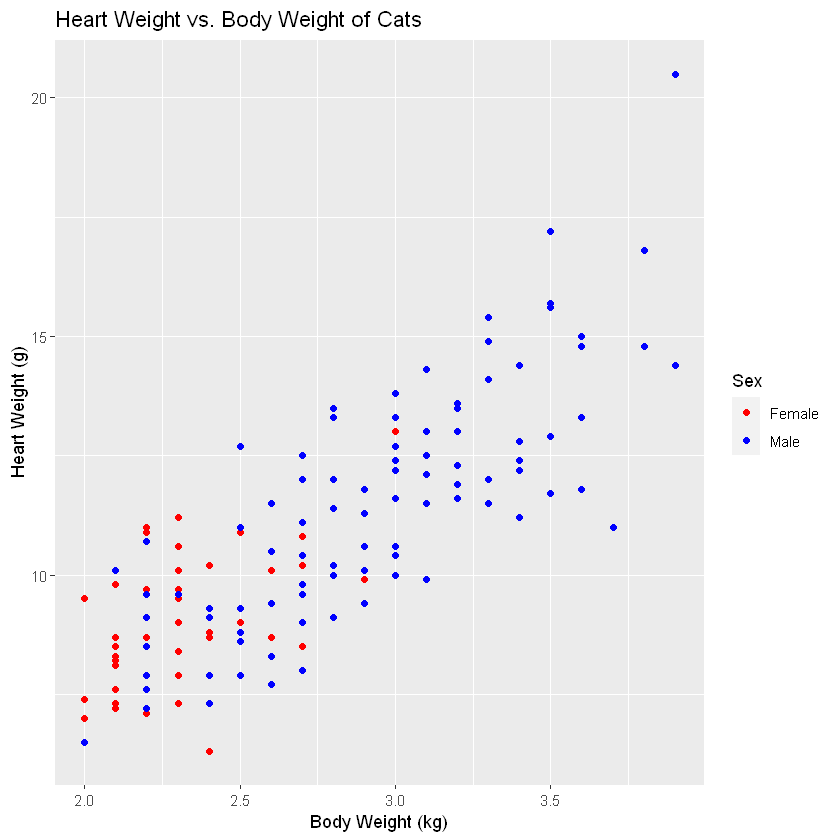

In [1]:
library(MASS)
library(ggplot2)

#1A)
ggplot(cats, aes(x = Bwt, y = Hwt, color = Sex)) +
  geom_point() +
  labs(title = "Heart Weight vs. Body Weight of Cats",
       x = "Body Weight (kg)",
       y = "Heart Weight (g)") +
  scale_color_manual(values = c("red", "blue"), labels = c("Female", "Male"))


In [2]:
#1B
cats_lm <- lm(Hwt ~ Bwt + Sex, data = cats)
summary(cats_lm)


Call:
lm(formula = Hwt ~ Bwt + Sex, data = cats)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5833 -0.9700 -0.0948  1.0432  5.1016 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.4149     0.7273  -0.571    0.569    
Bwt           4.0758     0.2948  13.826   <2e-16 ***
SexM         -0.0821     0.3040  -0.270    0.788    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.457 on 141 degrees of freedom
Multiple R-squared:  0.6468,	Adjusted R-squared:  0.6418 
F-statistic: 129.1 on 2 and 141 DF,  p-value: < 2.2e-16


<b>1C)</b>
 <br>
<b>Hwt = -0.4149 + 4.0758(Bwt) - 0.0821(SexM)</b>
 <br>
*SexM is 1 if its a Male and 0 if its a Female*

Body weight is statistically significant to heart weight becasue heart weight increases the higher the body weight.

Sex is not significant because male and female cat have similar heart weight with similar body weights.

This means that the heart weight in cats its primarily associated with body weight.


<b>1D)</b>
R-squared value of 0.6468 suggests that the model accounts for 64.68% of the variance in heart weights.

The p-value of p < 2.2e-16 indicates that the overall model is statistically significant. This means that the combination of body weight and sex significantly predicts heart weight, even though sex alone is not a significant predictor.

In [3]:
#1E)
new_cat <- data.frame(Bwt = 3.4, Sex = factor("F", levels = levels(cats$Sex)))
predict(cats_lm, newdata = new_cat, interval = "prediction", level = 0.95)

,fit,lwr,upr
1,13.44266,10.46904,16.41628


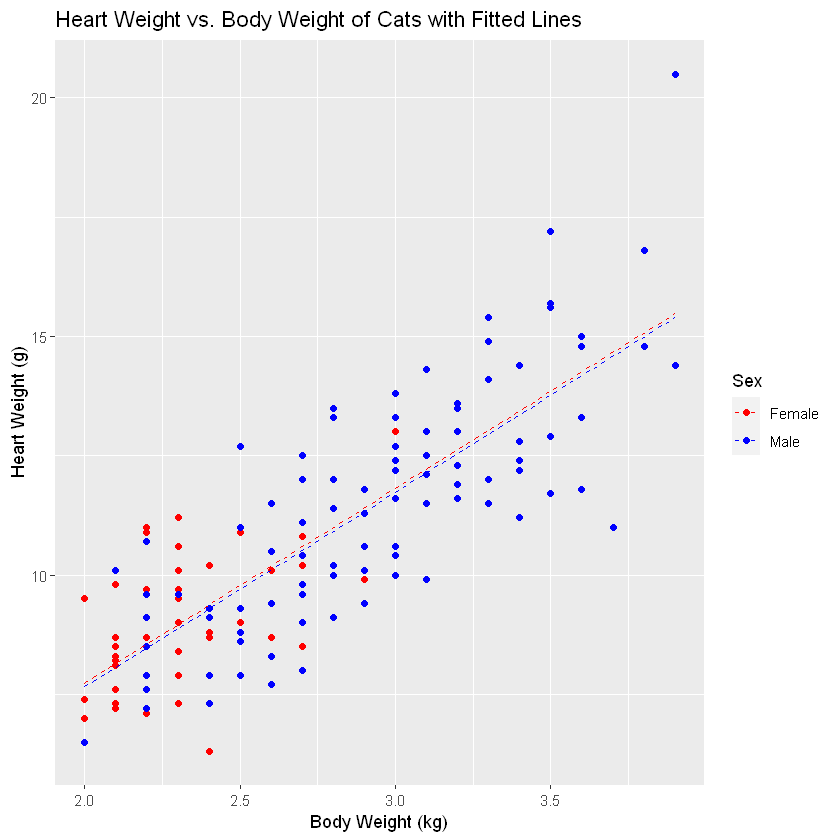

In [4]:
#1F)
new_data <- expand.grid(Bwt = seq(min(cats$Bwt), max(cats$Bwt), length.out = 100), Sex = levels(cats$Sex))
new_data$Hwt_pred <- predict(cats_lm, newdata = new_data)

ggplot(cats, aes(x = Bwt, y = Hwt, color = Sex)) +
  geom_point() +
  geom_line(data = new_data, aes(y = Hwt_pred, group = Sex), linetype = "dashed") +
  labs(title = "Heart Weight vs. Body Weight of Cats with Fitted Lines",
       x = "Body Weight (kg)",
       y = "Heart Weight (g)") +
  scale_color_manual(values = c("red", "blue"), labels = c("Female", "Male"))

The lines for male and female cats are almost identical which means that the difference in heart weight between sexes is not significant. This show that body weight is the significant factory of heart weight.

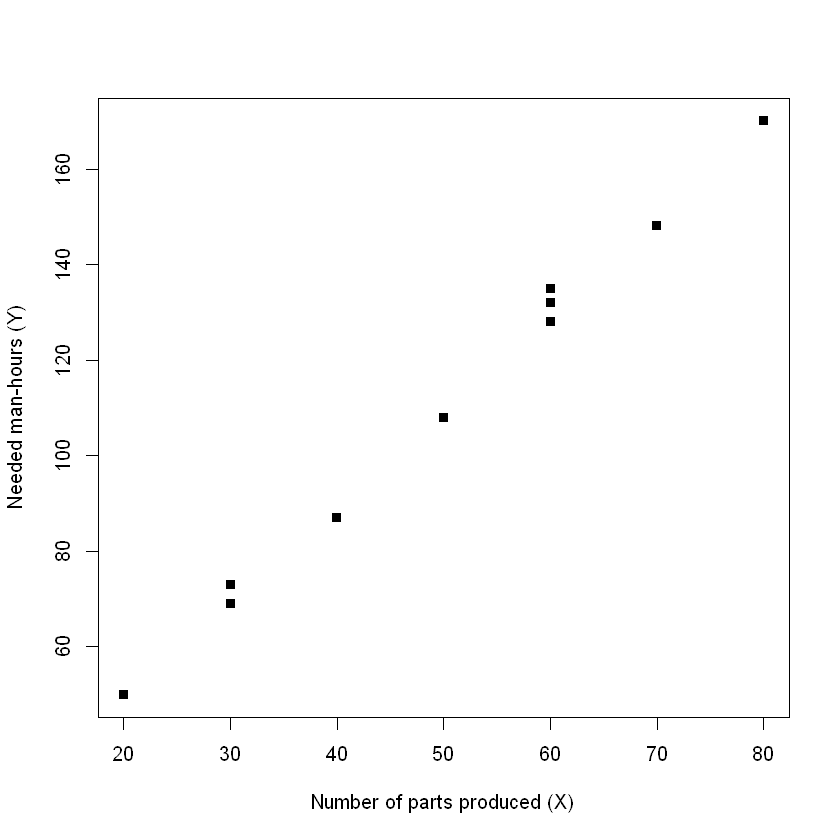

In [5]:
#2A)
X <- c(30, 20, 60, 80, 40, 50, 60, 30, 70, 60)
Y <- c(73, 50, 128, 170, 87, 108, 135, 69, 148, 132)
plot(X, Y, xlab = "Number of parts produced (X)", ylab = "Needed man-hours (Y)", pch = 15)

In [6]:
#2B)
intercept_manager <- 9.5
slope_manager <- 2.1

Yh <- intercept_manager + slope_manager * X

table_data_yh = matrix(c(X, Yh), ncol=2)
colnames(table_data_yh) <- c('X', 'Yh')
rownames(table_data_yh) <- c(1:10)
table <- as.table(table_data_yh)
table

       X    Yh
1   30.0  72.5
2   20.0  51.5
3   60.0 135.5
4   80.0 177.5
5   40.0  93.5
6   50.0 114.5
7   60.0 135.5
8   30.0  72.5
9   70.0 156.5
10  60.0 135.5

In [7]:
#2C)
model <- lm(Y ~ X)
summary(model)


Call:
lm(formula = Y ~ X)

Residuals:
   Min     1Q Median     3Q    Max 
  -3.0   -2.0   -0.5    1.5    5.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.00000    2.50294   3.995  0.00398 ** 
X            2.00000    0.04697  42.583 1.02e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.739 on 8 degrees of freedom
Multiple R-squared:  0.9956,	Adjusted R-squared:  0.9951 
F-statistic:  1813 on 1 and 8 DF,  p-value: 1.02e-10


In [8]:
#2D)
intercept_model <- coefficients(model)[1]
slope_model <- coefficients(model)[2]

Yhat <- intercept_model + slope_model * X

table_data_yhat = matrix(c(X, Yhat), ncol=2)
colnames(table_data_yhat) <- c('X', 'Yhat')
rownames(table_data_yhat) <- c(1:10)
table <- as.table(table_data_yhat)
table


     X Yhat
1   30   70
2   20   50
3   60  130
4   80  170
5   40   90
6   50  110
7   60  130
8   30   70
9   70  150
10  60  130

In [9]:
#2E)
residuals_manager <- Y - Yh
residuals_model <- residuals(model)

sum_res_manager <- sum(residuals_manager^2)
sum_res_model <- sum(residuals_model^2)

sprintf("Sum of Residuals for Manager model: %f", sum_res_manager)
sprintf("Sum of Residuals for New model: %f", sum_res_model)

[1] "Sum of Residuals for Manager model: 296.500000"

[1] "Sum of Residuals for New model: 60.000000"

The model in part (c) has lower sum of residual which indicates it fits the data better than the managers model

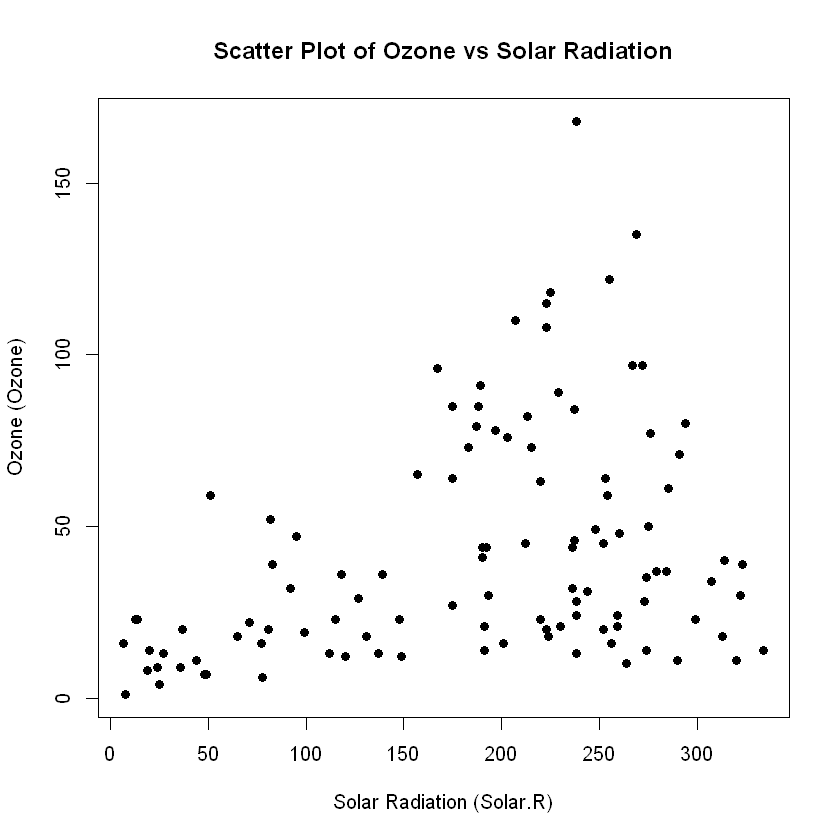

In [10]:
#3A)
airquality <- na.omit(airquality)
plot(airquality$Solar.R, airquality$Ozone, main = "Scatter Plot of Ozone vs Solar Radiation",
     xlab = "Solar Radiation (Solar.R)", ylab = "Ozone (Ozone)", pch = 19)

In [11]:
#3B
model1 <- lm(Ozone ~ Solar.R, data = airquality)
model2 <- lm(Ozone ~ Solar.R + I(Solar.R^2), data = airquality)
model3 <- lm(log(Ozone) ~ Solar.R, data = airquality)
model4 <- lm(log(Ozone) ~ Solar.R + I(Solar.R^2), data = airquality)



In [12]:
#3C
evaluate_model <- function(model, data, response) {
  fitted_values <- predict(model, data)
  
  if (grepl("log", as.character(model$call)[2])) {
    fitted_values <- exp(fitted_values)
  }
  
  residuals <- data[[response]] - fitted_values
  mse <- mean(residuals^2)
  r_squared <- summary(model)$r.squared
  
  list(MSE = mse, R_squared = r_squared)
}

results_model1 <- evaluate_model(model1, airquality, "Ozone")
results_model2 <- evaluate_model(model2, airquality, "Ozone")
results_model3 <- evaluate_model(model3, airquality, "Ozone")
results_model4 <- evaluate_model(model4, airquality, "Ozone")


In [13]:
#3D)
results <- data.frame(
  Model = c("Model1", "Model2", "Model3", "Model4"),
  R_squared = c(results_model1$R_squared, results_model2$R_squared, results_model3$R_squared, results_model4$R_squared),
  MSE = c(results_model1$MSE, results_model2$MSE, results_model3$MSE, results_model4$MSE)
)

results

Model,R_squared,MSE
<chr>,<dbl>,<dbl>
Model1,0.1213419,964.1642
Model2,0.2104461,866.3890
Model3,0.2080347,1101.1980
Model4,0.3527139,923.9484


The best model will be model 4 because it has the highet R-squared value which indicates the variance in Ozone levels, although its MSE is not the lowest, it is still reasonably low.
The worst model is model 1 because it has the lowest R-squared value which indicates the least variance in Ozone levels.